# 20.0 简介

## 神经网络基础笔记

### 1. 神经元（unit）
- **计算流程**：输入 × 权重 + 偏置 → 激活函数 → 输出
- **核心作用**：作为神经网络的基本计算单元，将输入数据转换为可传递的信号

---

### 2. 前馈神经网络（多层感知器，MLP）
- **结构**：输入层 → 隐藏层 → 输出层
- **关键特点**：
  - 数据单向向前传播，无循环连接
  - 多层隐藏层的深度网络，即深度学习的基础形式

---

### 3. 训练流程
- **前向传播**：输入数据逐层计算，得到模型预测值
- **损失函数**：衡量预测值与真实值之间的差距，指导优化方向
- **反向传播**：通过链式法则计算梯度，更新权重与偏置
- **Epoch**：对训练集中所有样本完成一次完整的前向 + 反向传播

---

### 4. Keras 工具
- **定位**：高层 API，以 TensorFlow/Theano 为后端，简化网络设计与训练
- **优势**：支持 CPU/GPU 训练，大型网络建议使用 GPU 加速

---


# 20.1 为神经网络预处理数据

In [1]:
# 加载库
from sklearn import preprocessing
import numpy as np

#创建特征
features = np.array([[-100.1,3240.1],
                     [-200.2,-234.1],
                     [5000.5,150.1],
                     [6000.6,-125.1],
                     [9000.9,-673.1]])

# 加载scaler
scaler = preprocessing.StandardScaler()

# 转换特征
features_standardized = scaler.fit_transform(features)

# 展示特征
features_standardized



array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [2]:
# 打印均值和标准差
print('Mean:',round(features_standardized[:,0].mean()))
print('Standard deviation:',features_standardized[:,0].std())

Mean: 0
Standard deviation: 0.9999999999999999


## 特征标准化：神经网络训练的必要预处理

### 1. 问题
神经网络对输入特征的尺度非常敏感，不同量纲的特征会导致训练不稳定，因此需要在训练前对特征进行预处理。

### 2. 方案
使用 `StandardScaler` 对每个特征进行标准化，使其均值为 0，标准差为 1。

### 3. 原因
- 网络参数通常初始化为小的随机数，如果特征值过大，加权求和后容易使神经元陷入饱和区，导致梯度消失或爆炸，训练不稳定。
- 神经元的计算涉及对输入的加权求和，如果特征之间量纲差异大，量级大的特征会主导更新，不利于模型学习所有特征的有效信息。



# 20.2 设计一个神经网络

In [3]:
# 加载库
from  keras import models
from  keras import layers

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation = 'relu',input_shape = (10,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation = 'relu'))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units = 1,activation = 'sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',# 交叉熵
                optimizer = 'rmsprop',# 均方根传播
                metrics = ['accuracy'])# 将准确率作为性能指标

## 1.核心步骤

1. **初始化模型**
   `network = models.Sequential()`

2. **添加层**
   `network.add(layers.Dense(...))`

3. **编译模型**
   指定损失函数、优化器、评估指标

---

## 2.神经元计算步骤

1. **接收输入**
2. **输入 × 权重**
3. **加权和 + 偏置**
4. **应用激活函数**
5. **输出至下一层**

---

## 3.关键选择
| 决策项 | 二元分类 (Binary Classification) | 多元分类 (Multi-class Classification) | 回归 (Regression) |
|--------|-----------------------------------|----------------------------------------|--------------------|
| 输出层激活函数 | sigmoid | softmax | 无 (或 linear) |
| 损失函数 | binary_crossentropy | categorical_crossentropy | MSE (均方误差) |
| 隐藏层激活函数 | ReLU (主流) | ReLU | ReLU |

# 20.3 训练一个二元分类器

In [8]:
# 加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 设定随机种子
np.random.seed(0)

# 设定想要的特征数量
number_of_features = 1000

# 从影评数据中加载数据和目标向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

# 将影评数据转化为one-hot编码过的特征矩阵
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

# 创建神经网络对象
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation = 'relu',input_shape = (number_of_features,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation = 'relu'))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units = 1,activation = 'sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])

# 训练神经网络
history = network.fit(features_train, # 特征
                      target_train,# 目标向量
                      epochs = 3,#epochs的数量
                      verbose = 1,#每个epochs之后打印描述
                      batch_size=100,# 每个批次中观察值的数量
                      validation_data = (features_test,target_test)# 测试数据
                      )

Epoch 1/3


250/250 [==============================] - 3s 6ms/step - loss: 0.4312 - accuracy: 0.8072 - val_loss: 0.3363 - val_accuracy: 0.8580
Epoch 2/3
250/250 [==============================] - 1s 4ms/step - loss: 0.3224 - accuracy: 0.8663 - val_loss: 0.3323 - val_accuracy: 0.8571
Epoch 3/3
250/250 [==============================] - 1s 4ms/step - loss: 0.3098 - accuracy: 0.8686 - val_loss: 0.3323 - val_accuracy: 0.8572


In [9]:
# 查看特征矩阵的形状
features_train.shape

(25000, 1000)


## 1. 数据集
IMDB 影评（25,000 条训练，25,000 条测试，正负情感分类）

## 2. 数据处理
文本 → one-hot 编码（1000 个高频词）

## 3. 训练方法
`network.fit()`

- 核心参数：`epochs`（训练轮数）、`batch_size`（批次大小）、`validation_data`（测试集）
- 返回 History 对象，记录各 epoch 的损失与准确率

# 20.4 训练一个多元分类器

In [13]:
# 加载库
import numpy as np
from keras.datasets import reuters
from keras.utils import to_categorical
from keras import models
from keras import layers

# 设定随机种子
np.random.seed(0)

# 设定我们想要的特征的数量
number_of_features  =5000

# 加载特征和目标向量
data = reuters.load_data(num_words = number_of_features)
(data_train,target_vector_train),(data_test,target_vector_test) = data

# 把特征数据转化为one_hot编码的特征数据
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

# 把独热编码的特征向量转换为特征矩阵
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 100,
                         activation = 'relu',
                         input_shape = (number_of_features,)
                         ))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 100,activation = 'relu'))

# 添加使用softmax函数的全连接层
network.add(layers.Dense(units = 46,activation = 'softmax'))

#编译神经网络
network.compile(loss = 'categorical_crossentropy',# 交叉熵
                optimizer = 'rmsprop',#均方根传播
                metrics=['accuracy']# 将准确率作为性能指标
                )

#训练神经网络
history = network.fit(features_train,# 特征
                      target_train,#目标向量
                      epochs = 3,#3个epochs
                      verbose = 1,#每个批次的观察值数量
                      validation_data = (features_test,target_test)#测试数据
                      )

Epoch 1/3
281/281 [==============================] - 3s 8ms/step - loss: 1.3383 - accuracy: 0.7042 - val_loss: 1.0180 - val_accuracy: 0.7694
Epoch 2/3
281/281 [==============================] - 2s 6ms/step - loss: 0.6742 - accuracy: 0.8504 - val_loss: 0.8956 - val_accuracy: 0.8023
Epoch 3/3
281/281 [==============================] - 2s 6ms/step - loss: 0.4199 - accuracy: 0.9036 - val_loss: 0.9102 - val_accuracy: 0.8014


In [14]:
# 查看目标矩阵
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 1. 数据集
Reuters 新闻（46 类主题分类）

## 2. 关键调整
- 输出层：softmax 激活函数（输出各类别概率）
- 损失函数：categorical_crossentropy
- 目标变量：转换为 one-hot 编码（`to_categorical`）

# 20.5 训练一个回归模型

In [20]:
# 加载库
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 设置随机种子
np.random.seed(0)

# 生成特征向量和目标矩阵
features,target = make_regression(n_samples = 10000,
                                  n_features = 3,
                                  n_informative = 3,
                                  n_targets = 1,
                                  noise=0.0,
                                  random_state=0)

# 把数据分为训练集和测试集
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.33,random_state=0)

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 32,
                         activation = 'relu',
                         input_shape = (features_train.shape[1],)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 32,activation = 'relu'))

# 添加没有激活函数的全连接层
network.add(layers.Dense(units=1))

# 编译神经网络
network.compile(loss = 'mse',# 均方误差
                optimizer = 'RMSprop',# 优化算法
                metrics = ['mse']#均方误差
                )

#训练神经网络
history = network.fit(features_train,#特征
                      target_train,#目标向量
                      epochs = 10,#epoch的数量
                      verbose = 0,# 没有输出
                      batch_size = 100,#每个批次的观察值数量
                      validation_data = (features_test,target_test)# 测试数据
                      )

## 核心差异

- 输出层：单个神经元，**无激活函数**，直接输出连续数值
- 损失函数：均方误差（MSE），衡量预测值与真实值的平方差
- 评估指标：MSE（与损失函数一致）

# 20.6 做预测

In [22]:
# 加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 设置随机种子
np.random.seed(0)

# 设置想要的特征数量
number_of_features = 10000

# 加载IMBD电影的数据和特征向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

# 把IMBD数据转换为独热编码的特征矩阵
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16,activation='relu',input_shape = (number_of_features,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16,activation='relu'))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units=1,activation='sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',# 交叉熵
                optimizer = 'rmsprop',#均方根传播
                metrics = ['accuracy']#将准确率作为性能指标
                )

# 编译神经网络
history = network.fit(features_train,#特征值
                      target_train,#目标向量
                      epochs = 3,#epochs的数量
                      verbose = 0,#没有输出
                      batch_size=100,#每个批次的观察值数量
                      validation_data=(features_test,target_test)#测试数据
                      )

# 预测测试集的分类
predict_target = network.predict(features_test)

782/782 [==============================] - 1s 1ms/step


In [23]:
#查看第一个观察值属于分类一的预测概率
predict_target[0]

array([0.04743348], dtype=float32)

## 模型预测

1. 方法：使用训练好的模型调用 `predict()` 方法，输入特征矩阵，输出预测值。

2. 二元分类场景
   - 输出是样本属于类别 1 的概率（0~1 之间）
   - 接近 1 → 正类；接近 0 → 负类

# 20.7 可视化历史数据

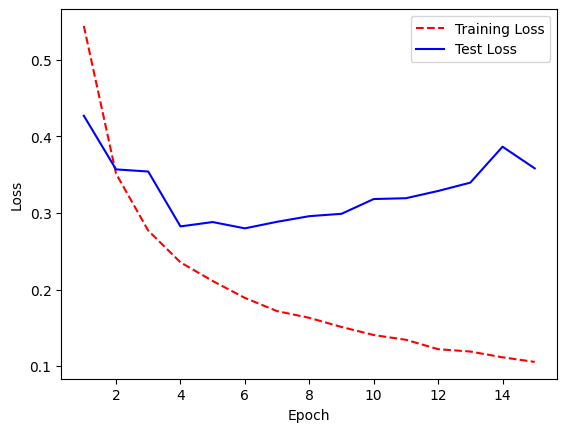

In [26]:
# 加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(0)

#选取我们想要的特征数量
number_of_features = 10000

#从影评数据中加载数据和目标向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

# 把影评数据转换为独热编码特征矩阵
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

#直接启动神经网络
network = models.Sequential()

#添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,
                         activation='relu',
                         input_shape = (number_of_features,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation='relu'))

#添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units = 1,activation='sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

# 训练神经网络
history = network.fit(features_train,#特征值
                      target_train,#目标
                      epochs = 15,# epochs的输出值
                      verbose = 0,# 没有输出
                      batch_size=1000,# 每个批次的观察值数量
                      validation_data=(features_test,target_test)#测试数据
                      )

# 获取训练集和测视力的损失历史数值
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# 为每个epochs创建编号
epoch_count = range(1,len(train_loss)+1)

# 画出损失的历史数值
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

- 解读：测试损失的最低点是模型泛化能力最强的点，之后继续训练会导致过拟合。
- 甜蜜点大概在epoch=4的位置

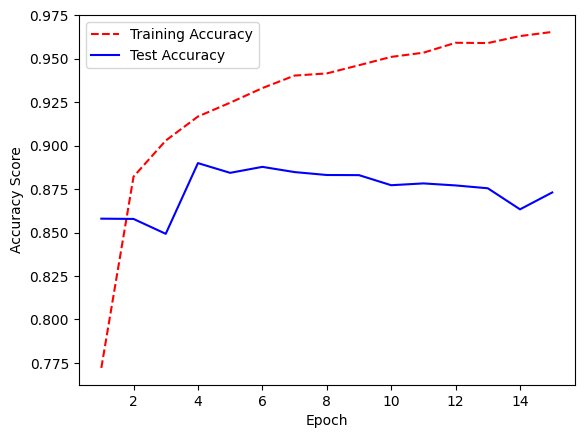

In [29]:
# 获取训练集和测试集书籍的准确率历史数值
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

#可视化准确率的历史数值
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()


## 甜蜜点（Sweet Spot）

1. 目的：找到“甜蜜点”（sweet spot），即测试集损失最小的 epoch，避免过拟合。

2. 关键指标
   - 训练损失（Training Loss）：随 epoch 持续下降
   - 测试损失（Test Loss）：先下降，过拟合开始后上升

# 20.8 通过权重调节减少过拟合

In [30]:
# 加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

# 设置随机种子
np.random.seed(0)

# 设置我们想要的特征数量
number_of_features = 1000

# 从影评数据中加载数据和目标向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

# 把影评数据转换为独热编码的特征矩阵
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation='relu'))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units = 1,activation='sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',# 交叉熵
                optimizer = 'rmsprop',# 均方根传播
                metrics = ['accuracy'])# 将准确率作为性能指标

# 训练神经网络
history = network.fit(features_train,# 特征
                      target_train,# 目标向量
                      epochs = 3,# epoch的数量
                      verbose = 0,# 没有输出
                      batch_size=100,# 每个批次的观察值数量
                      validation_data = (features_test,target_test)# 测试数据
                      )


-   **原理**：当测试集损失不再下降时自动停止训练，防止模型 “记住” 训练数据。
- **关键参数**：
  - `monitor`：监控的指标（如 val_loss）
  - `patience`：连续多少个 epoch 无改善则停止训练
  - `save_best_only`：仅保存测试集表现最优的模型

# 20.9 通过提前结束减少过拟合

In [33]:
# 加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping,ModelCheckpoint

# 设置随机种子
np.random.seed(0)

# 设置我们想要的特征数量
number_of_features = 1000

# 从影评数据中加载数据和目标向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

# 把影评数据转化为独热编码的特征矩阵
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

#启动神经网络
network = models.Sequential()

#添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,
                         activation='relu',
                         input_shape=(number_of_features,)))

#添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation='relu'))

#添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 1,activation='sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',#交叉熵
                optimizer = 'rmsprop',#均方根传播
                metrics = ['accuracy'])#将准确率作为性能指标

# 设置一个回调函数来提前结束训练，并保存训练结束时的最佳模型
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath = 'best_model.keras',
                             monitor='val_loss',
                             save_best_only=True),]

#训练神经网络
history = network.fit(features_train,#特征
                      target_train,#目标向量
                      epochs = 20,#epoch的数量
                      callbacks = callbacks,#提前结束
                      verbose = 1,# 每个批次的观察值数量
                      validation_data=(features_test,target_test)# 测试数据
                      )


Epoch 1/20
782/782 [==============================] - 6s 4ms/step - loss: 0.3886 - accuracy: 0.8285 - val_loss: 0.3298 - val_accuracy: 0.8618
Epoch 2/20
782/782 [==============================] - 3s 3ms/step - loss: 0.3225 - accuracy: 0.8654 - val_loss: 0.3433 - val_accuracy: 0.8547
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3122 - accuracy: 0.8702 - val_loss: 0.3309 - val_accuracy: 0.8620


- **原理**：当测试集损失不再下降时自动停止训练，防止模型 “记住” 训练数据。
- **关键参数**：
  - `monitor`：监控的指标（如 val_loss）
  - `patience`：连续多少个 epoch 无改善则停止训练
  - `save_best_only`：仅保存测试集表现最优的模型

# 20.10 通过Dropout减少过拟合

In [35]:
# 加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

#设置随机种子
np.random.seed(0)

# 设置我们想要的特征数量
number_of_features = 1000

# 从影评数据中加载数据和目标向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

# 把影评数据转化为独热编码的特征矩阵
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

#启动神经网络
network = models.Sequential()

# 为输入层添加一个Dropout层
network.add(layers.Dropout(0.2,input_shape=(number_of_features,)))

# 添加一个使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation='relu'))

# 为前面的隐藏层添加一个Dropout层
network.add(layers.Dropout(0.5))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation='relu'))

# 为前面的隐藏层添加一个Dropout层
network.add(layers.Dropout(0.5))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units = 1,activation='sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',# 交叉熵
                optimizer = 'rmsprop',# 均方根传播
                metrics = ['accuracy'])#将准确率作为性能指标

# 训练神经网络
history = network.fit(features_train,#特征
                      target_train,# 目标向量
                      epochs = 3,# epoch的数量
                      verbose = 0,# 没有输出
                      batch_size=100,#每个批次的观察值数量
                      validation_data=(features_test,target_test)#测试数据
                      )

- **原理**：在训练时随机丢弃一部分神经元，迫使网络学习更鲁棒的特征，防止过拟合。
- 讨论：
  - 每个批次的网络结构略有不同，避免网络对特定神经元过度依赖。
  - 输入层和隐藏层均可添加 Dropout，丢弃比例通常为 0.2~0.5。

# 20.11 保存模型训练过程

In [37]:
# 加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

# 设定随机种子
np.random.seed(0)

# 设置我们想要的特征数量
number_of_features = 1000

# 从影评数据中加载数据和目标向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

# 把影评数据转换为独热编码的特征矩阵
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,
                         activation='relu',
                         input_shape=(number_of_features,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units = 16,activation='relu'))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units = 1,activation='sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',# 交叉熵
                optimizer = 'rmsprop',# 均方根传播
                metrics = ['accuracy'])# 将准确率作为性能指标

# 设置一个回调函数啦提前结束训练，并保存训练结束时的最佳模型
checkpoint = [ModelCheckpoint(filepath = 'best_model1.keras')]

# 训练神经网络
history = network.fit(features_train,# 特征
                      target_train,# 目标向量
                      epochs = 3,#epoch的数量
                      callbacks = checkpoint,# 检查点
                      verbose = 0,# 没有输出
                      batch_size=100,# 每个批次的观察值数量
                      validation_data=(features_test,target_test)# 测试数据
                      )

- **目的**：防止训练中断导致模型丢失，或保存测试集表现最佳的模型。
- **优势**：即使训练被打断，也能恢复到之前的最佳状态。

# 20.12 使用k折交叉验证评估神经网络

In [7]:
import numpy as np
from tensorflow.keras import models, layers
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# 生成数据
np.random.seed(0)
number_of_features = 100

features, target = make_classification(
    n_samples=10000,
    n_features=number_of_features,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[.5, .5],
    random_state=0
)

# 定义模型创建函数（返回已编译模型）
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))
    network.add(layers.Dense(units=1, activation='sigmoid'))
    network.compile(
        loss='binary_crossentropy',
        optimizer='rmsprop',
        metrics=['accuracy']
    )
    return network

# 手动交叉验证
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(features, target)):
    print(f"Fold {fold+1}/{kfold.n_splits}")
    X_train, X_val = features[train_idx], features[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]

    # 每次折叠创建新模型（保证独立性）
    model = create_network()

    # 训练模型
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=100,
        verbose=0,          # 设为 1 可查看训练过程
        validation_data=(X_val, y_val)
    )

    # 预测并计算准确率
    y_pred = (model.predict(X_val) > 0.5).astype(int).flatten()
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)
    print(f"Fold accuracy: {acc:.4f}")

print("\n各折准确率:", scores)
print("平均准确率:", np.mean(scores))

Fold 1/3


105/105 [==============================] - 0s 1ms/step
Fold accuracy: 0.8140
Fold 2/3
105/105 [==============================] - 0s 1ms/step
Fold accuracy: 0.8731
Fold 3/3
105/105 [==============================] - 0s 1ms/step
Fold accuracy: 0.8374

各折准确率: [0.8140371925614877, 0.873087308730873, 0.8373837383738374]
平均准确率: 0.8415027465553994


- 适用场景：数据集规模较小时，最大化评估模型的泛化能力。
- 代码实现：用 `KerasClassifier` 封装模型，结合 `scikit-learn` 的 `cross_val_score`
- 讨论：大数据集不推荐，因为训练时间长，通常直接用测试集评估即可。

# 20.13 调教神经网络

In [9]:
# 加载库
import numpy as np
from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# 设置随机种子
np.random.seed(0)

# 特征的数量
number_of_features = 100

# 生成特征矩阵和目标向量
features,target = make_classification(n_samples=10000,
                                      n_features=number_of_features,
                                      n_informative=3,
                                      n_redundant=0,
                                      n_classes=2,
                                      weights=[.5,.5],
                                      random_state=0
                                      )

# 创建一个函数，返回编译过的神经网络
def create_network(optimizer = 'rmsprop'):

    # 启动神经网络
    network = models.Sequential()

    # 添加使用ReLU激活函数的全连接层
    network.add(layers.Dense(units=16, activation='relu',input_shape=(number_of_features,)))

    # 添加使用ReLU激活函数的全连接层
    network.add(layers.Dense(units=1, activation='relu'))

    # 添加使用sigmoid激活函数的全连接层
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # 编译神经网络
    network.compile(loss = 'binary_crossentropy',# 交叉熵
                    optimizer = optimizer,# 优化器
                    metrics = ['accuracy'])# 将准确率作为性能指标

    #返回编译过的网络
    return network

# 封装keras模型以便它能被scikit_learn使用
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# 创建超参数空间
epochs = [5,10]
batches = [5,10,100]
optimizers = ['rmsprop','adam']

# 创建超参数选项
hyperparameters = dict(optimizer = optimizers,epochs = epochs,batch_size = batches)

# 创建网格搜素
grid = GridSearchCV(estimator = neural_network, param_grid = hyperparameters)

# 实现网格搜索
grid_result = grid.fit(features, target)

C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initi

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._ensure_compiled_model()
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 439, in _ensure_compiled_model
    if not self.model_.compiled:
AttributeError: 'Sequential' object has no attribute 'compiled'. Did you mean: 'compile'?


In [10]:
import numpy as np
from keras import models, layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

np.random.seed(0)
number_of_features = 100

# 生成数据
features, target = make_classification(n_samples=10000,
                                       n_features=number_of_features,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=2,
                                       weights=[.5, .5],
                                       random_state=0)

# 创建函数，返回未编译的神经网络
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))
    network.add(layers.Dense(units=1, activation='relu'))  # 中间层建议增加单元数，但先保持原样
    network.add(layers.Dense(units=1, activation='sigmoid'))
    return network  # 不在这里编译

# 封装为 KerasClassifier，并指定损失、指标和默认优化器
neural_network = KerasClassifier(
    build_fn=create_network,
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer='rmsprop',  # 默认优化器，可被网格搜索覆盖
    verbose=0
)

# 超参数空间
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ['rmsprop', 'adam']

hyperparameters = {
    'optimizer': optimizers,
    'epochs': epochs,
    'batch_size': batches   # 注意参数名为 batch_size
}

# 网格搜索
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
grid_result = grid.fit(features, target)

# 输出最佳结果
print(f"Best score: {grid_result.best_score_}")
print(f"Best params: {grid_result.best_params_}")

C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initi

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._ensure_compiled_model()
  File "C:\Users\24677\anaconda3\envs\dl_env\lib\site-packages\scikeras\wrappers.py", line 439, in _ensure_compiled_model
    if not self.model_.compiled:
AttributeError: 'Sequential' object has no attribute 'compiled'. Did you mean: 'compile'?


# 20.14 可视化神经网络

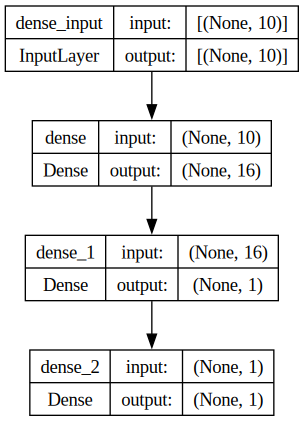

In [2]:
# 加载库
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras import models, layers
from IPython.display import SVG

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16, activation='relu', input_shape=(10,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=1, activation='relu'))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units=1, activation='sigmoid'))

# 可视化网格结构
SVG(model_to_dot(network,show_shapes=True).create(prog = 'dot',format='svg'))



## 目的
快速查看网络结构，辅助调试和理解数据流。

## 核心工具
- `model_to_dot`: 在 Jupyter Notebook 中生成网络结构的 SVG 图。
- `plot_model`: 将网络结构保存为图片文件（如 PNG）。

## 关键参数
- `show_shapes=True`: 显示每层的输入/输出形状，便于调试。



# 20.15 图像分类

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

# 设置色彩通道值优先
K.set_image_data_format('channels_first')

# 设置随机种子
np.random.seed(0)

# 图像信息
channels = 1
height = 28
width = 28

# 从MNIST数据集中读取数据和目标
(data_train, target_train), (data_test, target_test) = mnist.load_data()

#将训练集图像数据转换成特征
data_train = data_train.reshape(data_train.shape[0],channels,height,width)

# 将测试集图像数据转换为特征
data_test = data_test.reshape(data_test.shape[0],channels,height,width)

# 将像素的强度值收缩到0到1之间
features_train = data_train/255
features_test = data_test/255

# 对目标进行独热编码
target_train = to_categorical(target_train)
target_test = to_categorical(target_test)
number_of_classes = target_test.shape[1]

# 启动神经网络
network = Sequential()

# 添加有64个过滤器，一个为5X5的窗口和ReLU激活函数的卷积层
network.add(Conv2D(filters = 64,
                   kernel_size = (5,5),
                   input_shape = (channels,height,width),
                   activation = 'relu'))

#添加带一个2X2窗口的最大池化层
network.add(MaxPooling2D(pool_size = (2,2)))

#添加一个Dropout层
network.add(Dropout(0.5))

#添加一层来压平输入
network.add(Flatten())

# 添加带ReLU激活函数的有128个神经元的全连接层
network.add(Dense(128,activation = 'relu'))

# 添加Dropout层
network.add(Dropout(0.5))

# 添加使用softmax激活函数的全连接层
network.add(Dense(number_of_classes,activation = 'softmax'))

# 编译神经网络
network.compile(loss = 'categorical_crossentropy',# 交叉熵
                optimizer = 'rmsprop',# 均方根传播
                metrics = ['accuracy']# 将准确率作为性能指标
                )

# 训练神经网络
network.fit(features_train,# 特征
            target_train,# 目标向量
            epochs = 2,#epochs的数量
            verbose = 1,
            batch_size = 1000,# 每个批次的观察值数量
            validation_data = (features_test,target_test)# 测试数据
            )

- **问题**：使用卷积神经网络对图像进行分类（以 MNIST 手写数字识别为例）。
- **核心层与作用：**

| 层类型 | 作用 |
| :--- | :--- |
| Conv2D | 卷积层，通过滑动窗口提取图像的局部特征（如边缘、纹理）。 |
| MaxPooling2D | 池化层，对特征图降维，保留关键信息，减少计算量。 |
| Dropout | 随机丢弃神经元，防止过拟合。 |
| Flatten | 将多维卷积输出压平，转换为全连接层可接受的一维向量。 |
| Dense | 全连接层，最终进行分类。 |

- **数据预处理**：
  1. 将图像数据 `reshape` 为（样本数、通道数、高度、宽度）。
  2. 将像素值缩放到 \([0, 1]\) 区间。
  3. 对目标标签进行 one-hot 编码。

- **输出层**：使用 `softmax` 激活函数，输出 10 个数字类别的概率。

- **讨论**：
  - CNN 解决了前馈网络的两大缺陷：不考虑像素间的空间关系，以及无法识别物体在图像中的位置。
  - 卷积层提取局部模式，池化层降低维度，使网络对物体的平移、缩放具有鲁棒性。


# 20.16通过图像增强来改善卷积神经网络的性能

In [9]:
#加载库
from keras.preprocessing.image import ImageDataGenerator

# 创建图像增强对象
augmentation = ImageDataGenerator(
    featurewise_center = False,#实施ZCA白化
    zoom_range=0.3,#随机放大图像
    width_shift_range=0.2,#随机打乱图像
    horizontal_flip=True,# 随机翻转图像
    rotation_range=90#随机旋转图像
)

# 对row/images文件夹下的图像进行处理
augment_image = augmentation.flow_from_directory(
    'raw/images',# 图像文件夹
    batch_size=32,# 批次的大小
    class_mode= 'binary',# 分类
    save_to_dir='processed/images'
)

# 使用生成器训练
network.fit_generator(
    train_generator,
    steps_per_epoch=2000,
    epochs=5,
    validation_data=test_generator,
    validation_steps=800
)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'raw/images'

由于资源缺失代码无法运行

- **目的**：通过对图像进行随机变换，增加数据多样性，防止过拟合，提升模型泛化能力。

- **核心工具**：ImageDataGenerator，可实现多种图像预处理和增强操作。

- **常见增强方式**：
  - 缩放（zoom）、平移（width/height shift）、水平翻转（horizontal flip）、旋转（rotation）。
  - ZCA 白化（featurewise_center），标准化像素值。

- **训练方式**：
  - 使用 `flow_from_directory` 从文件夹生成增强图像。
  - 训练时使用 `fit_generator` 而非 `fit`，因为生成器按需处理图像，避免内存溢出。

# 20.17 文本分类

In [13]:
#加载库
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers
from keras import backend as K
K.set_image_data_format('channels_last') # 恢复默认

# 设置随机种子
np.random.seed(0)

# 设置想要的特征数量
number_of_features = 1000

# 从影评数据中加载数据和目标向量
(data_train,target_train),(data_test,target_test) = imdb.load_data(num_words=number_of_features)

# 采用添加填充值或者截断的方法，使每个样本都有400个特征
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

# 启动神经网络
network = models.Sequential()

# 添加嵌入层
network.add(layers.Embedding(input_dim = number_of_features,output_dim = 128))

# 添加一个有128个神经元的长短期记忆网络层
network.add(layers.LSTM(units = 128))

# 添加使用sigmoid函数的全连接层
network.add(layers.Dense(units = 1,activation='sigmoid'))

# 编译神经网络
network.compile(loss = 'binary_crossentropy',# 交叉熵
                optimizer = 'Adam',# Adam优化器
                metrics = ['accuracy'])# 将准确率作为性能指标

# 训练神经网络
history = network.fit(features_train,# 特征
                      target_train,#目标向量
                      epochs = 3,#epochs的数量
                      verbose = 0,# 没有输出
                      batch_size = 1000,# 每个批次的样本数量
                      validation_data = (features_test,target_test)# 测试数据
                      )

In [14]:
# 查看第一个样本
print(data_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [15]:
#查看第一个样本
print(features_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

- **问题**：使用长短期记忆网络（LSTM）对文本进行情感分类（以 IMDB 影评为例）。

- **数据预处理**：
  1. 文本是整数序列（每个整数对应一个词），使用 `pad_sequences` 将所有序列填充 / 截断到固定长度（如 400），处理后样本前面填充 0，后面是实际的词索引。
  2. Embedding 层将离散的词索引转换为稠密的向量表示（词嵌入），替代 one-hot 编码，向量间的距离表示词的相似度。

- **网络结构**：
  - Embedding：词嵌入层，学习词的语义表示。
  - LSTM：长短期记忆层，128 个神经元，能“记住”之前输入的信息，解决了传统 RNN 的梯度消失问题，适合处理文本中的顺序依赖关系。
  - Dense(1, activation='sigmoid')：二元分类输出层。

- **讨论**：
  - LSTM 是递归神经网络（RNN）的一种，通过门控制捕捉文本中远距离的语义关联。
  - 与 CNN 不同，LSTM 更擅长处理顺序数据（如文本、时间序列）。

| 任务类型 | 推荐网络类型 | 核心层 / 技术 | 关键特点 |
|----------|--------------|----------------|----------|
| 图像分类 | 卷积神经网络 (CNN) | Conv2D, MaxPooling2D | 利用空间结构，提取局部特征，对图像平移鲁棒 |
| 文本分类 | 递归神经网络 (LSTM) | Embedding, LSTM | 处理顺序依赖，捕捉文本中的长距离语义关联 |
| 表格数据 | 全连接网络 (MLP) | Dense, ReLU | 适用于结构化数据，无空间 / 顺序结构 |
| 过拟合应对 | - | Dropout, L2 正则化，EarlyStopping | 提升模型泛化能力 |

# 第20章 神经网络 精简总结

## 一、核心概念
- **神经网络**：由神经元（unit）组成的计算模型，通过“输入×权重+偏置→激活函数→输出”的方式，拟合复杂的非线性关系。
- **前馈神经网络（MLP）**：数据从输入层单向传播到输出层，是最基础的深度学习结构。
- **训练流程**：前向传播（计算预测）→ 损失函数（衡量误差）→ 反向传播（更新权重）→ 迭代（epoch）。
- **Keras**：高层API，以TensorFlow为后端，专注网络设计，隐藏底层张量运算细节。

---

## 二、基础流程（全连接网络）
1.  **数据预处理**：必须标准化（`StandardScaler`），因为网络对特征尺度极度敏感。
2.  **网络设计（Sequential模型）**：
    -   输入层：节点数 = 特征数
    -   隐藏层：用ReLU激活，层数和神经元数决定模型容量
    -   输出层：
        -   二元分类：1个神经元 + sigmoid
        -   多元分类：k个神经元 + softmax
        -   回归：1个神经元 + 无激活函数
3.  **编译与训练**：
    -   损失函数：二元交叉熵 / 分类交叉熵 / MSE
    -   优化器：RMSprop、Adam等
    -   评估指标：准确率（分类）、MSE（回归）

---

## 三、过拟合应对（三大法宝）
1.  **L2正则化**：在损失函数中加入权重惩罚，抑制大权重，简化模型。
2.  **Early Stopping**：监控测试集损失，连续无改善则停止训练，自动找到“甜蜜点”。
3.  **Dropout**：训练时随机丢弃神经元，迫使网络学习更鲁棒的特征，避免过拟合。

---

## 四、模型管理与评估
-   **保存模型**：用`ModelCheckpoint`回调，防止训练中断，保存最佳模型。
-   **k折交叉验证**：小数据集上评估模型泛化能力，大数据集不推荐（耗时）。
-   **超参数调优**：用`GridSearchCV`遍历组合，自动寻找最优超参数（如epochs、batch_size）。

---

## 五、进阶网络应用
1.  **图像分类（CNN）**
    -   核心层：`Conv2D`（提取局部特征）、`MaxPooling2D`（降维）、`Flatten`（压平）。
    -   优势：利用图像空间结构，对平移、缩放鲁棒，解决了全连接网络的两大缺陷。
    -   增强：用`ImageDataGenerator`做随机变换（翻转、缩放等），提升泛化能力。
2.  **文本分类（LSTM）**
    -   预处理：用`pad_sequences`统一序列长度，`Embedding`层做词嵌入。
    -   核心：LSTM层，通过门控机制解决梯度消失，擅长处理文本中的顺序依赖和长距离语义。

---

## 六、一句话记住本章
-   表格数据 → **全连接网络（MLP）**
-   图像数据 → **卷积神经网络（CNN）**
-   文本/序列数据 → **递归神经网络（LSTM）**
-   过拟合？ → **Dropout + Early Stopping + L2正则化**

---
